In [1]:
# Continuing test in Python 
# Data was merged using sql and now data will be cleaned in Python.
# Data will be explored and answering further questions 

In [2]:
# Lets import the necessary libraries
import numpy as np; 
import pandas as pd; 
import seaborn as sns; 
import matplotlib.pyplot as plt;

In [3]:
# now lets load the dataset 
df = pd.read_csv('thefinaldataset.csv'); 

In [4]:
df.head(50) 

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,09/11/2020,34,11,11,2020,Monday,465.0,651.38,No Promo,707.0
1,10/11/2020,34,11,11,2020,Tuesday,10386.0,1298.25,Promotion Red,1455.0
2,11/11/2020,34,11,11,2020,Wednesday,12475.0,1559.38,Promotion Blue,1520.0
3,12/11/2020,34,11,11,2020,Thursday,11712.0,1801.75,No Promo,1726.0
4,13/11/2020,34,11,11,2020,Friday,10000.0,2614.50,No Promo,2134.0
5,14/11/2020,34,11,11,2020,Saturday,12996.0,1444.00,Promotion Blue,1316.0
6,15/11/2020,35,11,11,2020,Sunday,11929.0,1325.44,Promotion Blue,1287.0
7,16/11/2020,35,11,11,2020,Monday,5359.0,1119.11,No Promo,1548.0
8,17/11/2020,35,11,11,2020,Tuesday,12016.0,1092.36,Promotion Blue,1448.0
9,18/11/2020,35,11,11,2020,Wednesday,7441.0,906.70,No Promo,NaN


In [8]:
# Now lets check the null values 
# Null values in Revenue, Marketing Spend and Visiting column 
nullValues = df.isnull().sum() 
nullValues

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            4
Marketing Spend    4
Promo              0
Visitors           5
dtype: int64

In [9]:
# Lets put it in a dataframe 
from tabulate import tabulate 
nullValues

nullValues = pd.DataFrame(nullValues, columns = ['nullValues'])
nullValues

,nullValues
Date,0
Week_ID,0
Month Number,0
Month_ID,0
Year,0
Day_Name,0
Revenue,4
Marketing Spend,4
Promo,0
Visitors,5


<AxesSubplot:>

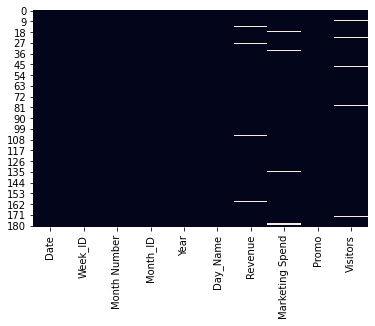

In [10]:
# Lets visualise null values via heatmap 
sns.heatmap(df.isnull(), cbar=False)

In [11]:
# Next is to impute the missing values, use simple imputer from scikit learn 
# Lets begin with revenue 
missing_col = ['Revenue']
missing_col1 = ['Marketing Spend']
missing_col2 = ['Visitors']

In [12]:
missing_col = ['Revenue']
# Impute Revenue column with mean 
# Why mean ?? 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 6:7])
df.iloc[:, 6:7] = imputer.transform(df.iloc[:, 6:7])

In [13]:
# now lets observe missing values for revenue column 
nullValues = df.isnull().sum(); 
nullValues

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            0
Marketing Spend    4
Promo              0
Visitors           5
dtype: int64

In [14]:
missing_col1 = ['Marketing Spend']
# now lets impute the marketing spend column with mean 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 7:8])
df.iloc[:, 7:8] = imputer.transform(df.iloc[:, 7:8])

In [15]:
# now lets observe missing values for revenue column 
nullValues = df.isnull().sum(); 
nullValues

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            0
Marketing Spend    0
Promo              0
Visitors           5
dtype: int64

In [16]:
missing_col2 = ['Visitors']
# lets impute the visitors column 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 9:10])
df.iloc[:, 9:10] = imputer.transform(df.iloc[:, 9:10])

In [17]:
# now lets observe missing values for visitors column 
nullValues = df.isnull().sum(); 
nullValues

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            0
Marketing Spend    0
Promo              0
Visitors           0
dtype: int64

<AxesSubplot:>

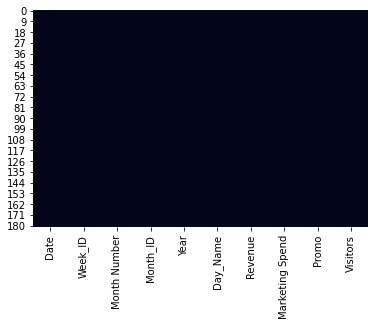

In [18]:
# now lets visualise to check if all null values have been imputed 
# can be seen that all null values have been imputed 
sns.heatmap(df.isnull(), cbar=False)

In [19]:
# lets take a look at the data 
df.head(50)

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,09/11/2020,34,11,11,2020,Monday,465.000000,651.380000,No Promo,707.000000
1,10/11/2020,34,11,11,2020,Tuesday,10386.000000,1298.250000,Promotion Red,1455.000000
2,11/11/2020,34,11,11,2020,Wednesday,12475.000000,1559.380000,Promotion Blue,1520.000000
3,12/11/2020,34,11,11,2020,Thursday,11712.000000,1801.750000,No Promo,1726.000000
4,13/11/2020,34,11,11,2020,Friday,10000.000000,2614.500000,No Promo,2134.000000
5,14/11/2020,34,11,11,2020,Saturday,12996.000000,1444.000000,Promotion Blue,1316.000000
6,15/11/2020,35,11,11,2020,Sunday,11929.000000,1325.440000,Promotion Blue,1287.000000
7,16/11/2020,35,11,11,2020,Monday,5359.000000,1119.110000,No Promo,1548.000000
8,17/11/2020,35,11,11,2020,Tuesday,12016.000000,1092.360000,Promotion Blue,1448.000000
9,18/11/2020,35,11,11,2020,Wednesday,7441.000000,906.700000,No Promo,1661.615819


In [21]:
# Now lets export this data for visualisation in Tableau 
theFinalData = df

theFinalData.to_csv('mergedcleaneddataa.csv')

In [22]:
# Now for demonstration lets continue our analysis in python before prediction 

In [23]:
# Lets look at the total revenue 
df['Revenue'].sum() 

1905746.5393258426

In [24]:
# Revenue by promo campaign 
df.groupby('Promo')['Revenue'].sum() 

Promo
No Promo          443039.134831
Promotion Blue    876514.269663
Promotion Red     586193.134831
Name: Revenue, dtype: float64

In [25]:
# Which day has the highest average visitors ?? 
df.groupby('Day_Name')['Visitors'].mean() 

Day_Name
Friday       1968.423077
Monday       1491.461538
Saturday     1381.778140
Sunday       1493.538462
Thursday     2244.985224
Tuesday      1436.000000
Wednesday    1615.124294
Name: Visitors, dtype: float64

In [26]:
# What promo cost the most ? 
df.groupby('Promo')['Marketing Spend'].sum() 

Promo
No Promo          87018.714944
Promotion Blue    99321.084944
Promotion Red     67685.779888
Name: Marketing Spend, dtype: float64

In [32]:
# Part 2 
# We will be predicting Revenue based on Marketing spend, visitors and promo 
# This is a regression task because we are predicting a continous value 
# We are going to use Multiple linear regression, Decision Trees and Random Forest 

In [33]:
# Multiple Linear Regression is when more than one independent variables is used to predict a dependent variable 
# Multiple linear regression assumes 
# 1. Linearity -> There must be a linear relationship between dependent and independent variables. 
# Scatter plots can be used to show whether there is a linear or curvilinear relationship 
# 2. Multivariate normality -> Multiple linear regression assumes the residuals (the differences between the observed value of the dependent 
# variable y and the predicted value y* are normally distributed )
# 3. Independence of errors -> assumes that the residuals(difference between observed values of the dependent variable y and predicted 
# value y are independent)
# 4. Lack of multicollinearity -> Multiple linear regression assumes that the independent variable are not highly correlated with each other.

In [34]:
# Decision tree builds regression in the form of tree structure. It breaks down dataset into smaller and smaller subsets 
# while at the same time an associated decision tree is incrementally developed 
# Random Forest Regression, this provides a better predictive power than decision trees. Random forest is an ensemble of decision trees 

In [35]:
# Now lets encode categorical data 
# now lets encode categorical data 
dummies = pd.get_dummies(df, columns=['Day_Name', 'Promo'])
dummies 

,Date,Week_ID,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,week_number_of_year,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,2020-09-11,34,11,11,2020,465.0,651.380000,707.0,37,0,1,0,0,0,0,0,1,0,0
1,2020-10-11,34,11,11,2020,10386.0,1298.250000,1455.0,41,0,0,0,0,0,1,0,0,0,1
2,2020-11-11,34,11,11,2020,12475.0,1559.380000,1520.0,46,0,0,0,0,0,0,1,0,1,0
3,2020-12-11,34,11,11,2020,11712.0,1801.750000,1726.0,50,0,0,0,0,1,0,0,1,0,0
4,2020-11-13,34,11,11,2020,10000.0,2614.500000,2134.0,46,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-05,60,5,17,2021,7284.0,1119.600000,1400.0,18,0,0,0,0,0,0,1,1,0,0
178,2021-06-05,60,5,17,2021,13021.0,2067.890000,2244.0,22,0,0,0,0,1,0,0,0,0,1
179,2021-07-05,60,5,17,2021,4587.0,1395.744944,2023.0,27,1,0,0,0,0,0,0,1,0,0
180,2021-08-05,60,5,17,2021,5927.0,1121.880000,1483.0,31,0,0,1,0,0,0,0,1,0,0


In [36]:
thefinalDataset = dummies 
thefinalDataset

,Date,Week_ID,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,week_number_of_year,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,2020-09-11,34,11,11,2020,465.0,651.380000,707.0,37,0,1,0,0,0,0,0,1,0,0
1,2020-10-11,34,11,11,2020,10386.0,1298.250000,1455.0,41,0,0,0,0,0,1,0,0,0,1
2,2020-11-11,34,11,11,2020,12475.0,1559.380000,1520.0,46,0,0,0,0,0,0,1,0,1,0
3,2020-12-11,34,11,11,2020,11712.0,1801.750000,1726.0,50,0,0,0,0,1,0,0,1,0,0
4,2020-11-13,34,11,11,2020,10000.0,2614.500000,2134.0,46,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-05,60,5,17,2021,7284.0,1119.600000,1400.0,18,0,0,0,0,0,0,1,1,0,0
178,2021-06-05,60,5,17,2021,13021.0,2067.890000,2244.0,22,0,0,0,0,1,0,0,0,0,1
179,2021-07-05,60,5,17,2021,4587.0,1395.744944,2023.0,27,1,0,0,0,0,0,0,1,0,0
180,2021-08-05,60,5,17,2021,5927.0,1121.880000,1483.0,31,0,0,1,0,0,0,0,1,0,0


In [37]:
thefinalDataset.columns 

Index(['Date', 'Week_ID', 'Month Number', 'Month_ID', 'Year', 'Revenue',
       'Marketing Spend', 'Visitors', 'week_number_of_year', 'Day_Name_Friday',
       'Day_Name_Monday', 'Day_Name_Saturday', 'Day_Name_Sunday',
       'Day_Name_Thursday', 'Day_Name_Tuesday', 'Day_Name_Wednesday',
       'Promo_No Promo', 'Promo_Promotion Blue', 'Promo_Promotion Red'],
      dtype='object')

In [38]:
# Now lets check which variable affects revenue the most ? 
X = thefinalDataset[[
       'Week_ID', 'Month Number',
       'Marketing Spend', 'Month Number','Visitors',
       'Day_Name_Friday', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red'
]]
y = thefinalDataset[['Revenue']]

In [40]:
# Now lets check the independent variables that affect dependent variable 
# variables with value of 0.05 or less have more influence on independent variable 
import statsmodels.api as sm 
X = sm.add_constant(X) 
result = sm.OLS(y, X).fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     44.22
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           8.04e-46
Time:                        12:51:20   Log-Likelihood:                -1712.8
No. Observations:                 182   AIC:                             3452.
Df Residuals:                     169   BIC:                             3493.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2221.8782 

In [42]:
thefinalDataset.columns 

Index(['Date', 'Week_ID', 'Month Number', 'Month_ID', 'Year', 'Revenue',
       'Marketing Spend', 'Visitors', 'week_number_of_year', 'Day_Name_Friday',
       'Day_Name_Monday', 'Day_Name_Saturday', 'Day_Name_Sunday',
       'Day_Name_Thursday', 'Day_Name_Tuesday', 'Day_Name_Wednesday',
       'Promo_No Promo', 'Promo_Promotion Blue', 'Promo_Promotion Red'],
      dtype='object')

In [43]:
# Split the dataset into training and test set 

X = thefinalDataset[['Week_ID', 'Month Number',
       'Marketing Spend', 'Month Number','Visitors',
       'Day_Name_Friday', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red']]
y = thefinalDataset[['Revenue']]

In [44]:
# split the dataset into training set and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [45]:
# training the multiple linear regression model on the training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = regressor.predict(X_test)
y_pred 

array([[ 4078.56463547],
       [12613.07465677],
       [13459.50680943],
       [ 8663.06588691],
       [ 3823.83312925],
       [ 3235.48488728],
       [ 4579.61255924],
       [ 5074.77881011],
       [14772.30360552],
       [20925.84209202],
       [15065.16215333],
       [14051.26011955],
       [ 5424.38774216],
       [ 8725.8064625 ],
       [18797.70783517],
       [14198.43133321],
       [ 2625.41632353],
       [ 9642.14359075],
       [ 7008.3806633 ],
       [13660.22200014],
       [ 8674.81121315],
       [12986.94388405],
       [ 4965.41266568],
       [11893.84032653],
       [12363.91437606],
       [15380.16680999],
       [ 3741.17676836],
       [ 8049.76062275],
       [10058.11688025],
       [10166.55881569],
       [11823.79617071],
       [ 3654.87184919],
       [ 4577.53241638],
       [ 8679.42985188],
       [13059.94789792],
       [ 5203.93054697],
       [13350.37454894]])

In [47]:
prediction = pd.DataFrame(y_pred, columns=['Predicted'])
prediction

,Predicted
0,4078.564635
1,12613.074657
2,13459.506809
3,8663.065887
4,3823.833129
5,3235.484887
6,4579.612559
7,5074.778810
8,14772.303606
9,20925.842092


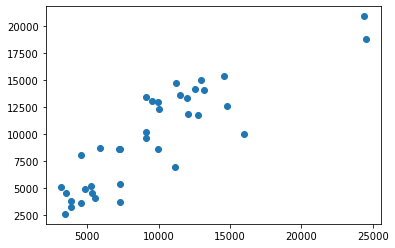

In [48]:

# Now lets use scatter plot to check correlation 
plt.scatter(y_test, y_pred)

In [49]:
# Now lets check r2 to find accuracy of model 
# 75% accuracy 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7571427198489373

In [57]:
X = thefinalDataset[['Week_ID', 'Month Number',
       'Marketing Spend', 'Month Number','Visitors',
       'Day_Name_Friday', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red']]
y = thefinalDataset[['Revenue']]

In [58]:
# split the dataset into training set and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [59]:
# Now lets use Decision Tree Model 
# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
y_pred = regressor.predict(X_test)
y_pred 

array([  465., 12445.,  8800.,  9486.,  5478.,  4020.,  7290.,  6047.,
       11699., 26608., 10386., 10647.,  5478.,  5574., 22587., 16777.,
         465.,  8802., 13281., 10027.,  9262., 11699.,  4587., 12783.,
        9125., 14012.,  4953.,  8456., 15288.,  9486., 10647.,  4403.,
        3926.,  3025., 11650.,  6047., 11650.])

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8278747713127873

In [62]:
# now lets look at random forest 

In [66]:
X = thefinalDataset[['Week_ID', 'Month Number',
       'Marketing Spend', 'Month Number','Visitors',
       'Day_Name_Friday', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red']]
y = thefinalDataset[['Revenue']]

In [67]:
# split the dataset into training set and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [68]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=10)

In [69]:
y_pred = regressor.predict(X_test)
y_pred 

array([ 6708.5       , 11304.2       ,  9464.        ,  9683.61348315,
        5326.1       ,  4402.8       ,  7559.42696629,  6492.12696629,
       11586.5       , 24441.1       , 10974.5       , 12517.9       ,
        5944.3       ,  5406.4       , 22855.3       , 14127.4       ,
        2759.7       ,  8903.8       ,  9880.7       , 11547.32696629,
        8400.3       , 11592.5       ,  5670.5       , 11628.4       ,
        9371.7       , 13834.41348315,  7496.24044944,  3949.7       ,
       12373.7       ,  9661.        , 12849.8       ,  5980.52696629,
        4352.        ,  4555.4       , 11278.21348315,  6087.21348315,
       10744.1       ])

In [70]:
# Random Forest has a higher accuracy than all models used 
# which has 91% accuracy 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9145339950435554

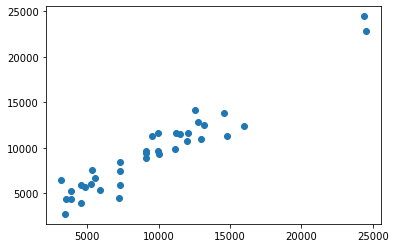

In [72]:
# Scatter plot reveals accurate positive correlation 
plt.scatter(y_test, y_pred)

In [73]:
# Now lets predict 

newData = [[
    0, 0, 5000, 0, 8000, 
    1, 0, 0, 
    0, 0, 0, 
    0, 0, 0, 
    1
]]

dataf = pd.DataFrame(newData, columns = [
    'Week_ID', 'Month Number',
       'Marketing Spend', 'Month Number','Visitors',
       'Day_Name_Friday', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red'])
dataf

,Week_ID,Month Number,Marketing Spend,Month Number,Visitors,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,0,0,5000,0,8000,1,0,0,0,0,0,0,0,0,1


In [74]:
# Predicted Revenue based on friday, 8,000 visitors, marketing spend of 5000 and Promotion Red 
prediction = regressor.predict(dataf)
prediction = pd.DataFrame(prediction, columns=['Prediction'])
prediction

,Prediction
0,13785.613483


In [75]:
# Most successful campaign is promotion blue so assuming we keep marketing spend of 5000 and visitors of 8000
newData = [[
    0, 0, 5000, 0, 8000, 
    1, 0, 0, 
    0, 0, 0, 
    0, 0, 1, 
    0
]]

dataf = pd.DataFrame(newData, columns = [
    'Week_ID', 'Month Number',
       'Marketing Spend', 'Month Number','Visitors',
       'Day_Name_Friday', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red'])
dataf 

,Week_ID,Month Number,Marketing Spend,Month Number,Visitors,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,0,0,5000,0,8000,1,0,0,0,0,0,0,0,1,0


In [76]:
# Predicted Revenue based on most succesful campaign which is Promotion Blue and assuming day is friday, estimated visitors is 
# 8000 and marketing spend is 5000. 
# Observed that revenue predicted to increase by 29.4% from Promo Red 
prediction = regressor.predict(dataf)
prediction = pd.DataFrame(prediction, columns=['Prediction'])
prediction

,Prediction
0,19934.553933
